In [12]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras

In [13]:
tf.__version__

'2.8.2'

In [14]:
keras.__version__

'2.8.0'

In [15]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data() #4개의 변수에 각각의 데이터 로드 됨.

In [16]:
print(X_train_full.shape) #샘플갯수, 샘플 하나의 사이즈(28x28 pixels)
print(X_train_full.dtype) #8비트의 unsigned integer/ 2의 8승까지 표현 가능 0부터 255까지의 정수 값 표현

(60000, 28, 28)
uint8


In [17]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255. 
#X_valid 변수에 앞의 5000개 변수만 저장하고, X_train 변수에 55000개의 데이터에 넣음.
#크로스 벨리데이션 과정!!
#255.0으로 나눈 이유? 0~255 값이였는데 정규화해서 0~1값으로 변경
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [18]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [19]:
class_names[y_train[0]]

'Coat'

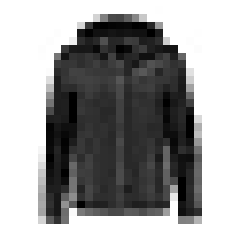

In [20]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [21]:
model = keras.models.Sequential() 
#케라스의 모델 형태인데 Sequential 클래스를 가져와 초기 선언 
#model이라는 변수는 Sequential API를 이용해서 딥러닝 모델을 정의하는 객체
model.add(keras.layers.Flatten(input_shape=[28, 28]))
#첫번째 layer가 추가. 입력층
# Flatten layer은 한줄의 벡터로 만들어 주는 역할. 784개인 벡터.
model.add(keras.layers.Dense(300, activation="relu"))
#Dense? 연결이 서로 촘촘하게 연결되어 있는 구조. Dense Net
#300? 각 층에서의 perceptron 갯수
#activation 활성화 함수/ 한 층에서는 동일한 함수를 사용함.
#이 층을 정의하는 parameter는 784x300의 가중치
model.add(keras.layers.Dense(100, activation="relu"))
#이 층을 정의하는 parameter는 300x100의 가중치
model.add(keras.layers.Dense(10, activation="softmax"))
#softmax를 쓰는 이유는 확률을 합해서 1이 나와야 해서/ 확률값을 출력하는 모델
#은닉층이 될 수 없고 출력층일 것.
#어디에 속할 확률이 높은지를 출력하는 모델인지 알 수 있음.

In [22]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
#표현하는 방식이 다른 모델 정의 방법
#처음에 Sequential을 정의할 때 리스트 안에 element들을 정의
#용도에 따라 다름.

In [23]:
model.summary()
#원래는 밑에서 위로 올라가는 그림. Flatten layer가 밑으로 내려갈 것.
#변수명이 책과 다른 이유는 내부에서 알아서 정해주기 때문.
#None: 입력으로 들어오는 데이터의 갯수가 가변적임을 의미. 병렬처리 가능. 나중에 말씀해주실 것!
#원래는 100x10은 1000으로 나와야 하는데 1010으로 나온 이유는 각 층에 상수값이 포함되어 있기 때문.
#parameter?? 매개변수 화살표 갯수...

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.layers #모델의 층 각각 리스트로 저장.

In [25]:
hidden1 = model.layers[1] #첫번째 층을 저장함.

In [26]:
hidden1.name

'dense_3'

In [29]:
model.get_layer('dense_3') is hidden1 #모델의 층 변수명을 넣어서 가져옴.

True

In [30]:
weights, biases = hidden1.get_weights()
#weights는 상수를 제외한 화살표 값
#biases는 상수의 화살표 값

In [31]:
weights

array([[-0.01268954,  0.00942025, -0.06876448, ..., -0.03598358,
         0.00561726, -0.07086397],
       [ 0.04713394,  0.03507918,  0.06722912, ..., -0.04849148,
         0.04971266, -0.07067896],
       [ 0.06159954, -0.05399722,  0.06915998, ...,  0.03036444,
        -0.00657649, -0.05310967],
       ...,
       [ 0.05088802,  0.02207467,  0.07387492, ...,  0.0673133 ,
         0.01377034,  0.02128094],
       [ 0.02797614,  0.06158663,  0.05228508, ..., -0.02971413,
         0.06433485,  0.07385036],
       [-0.06334062, -0.05117942, -0.01551404, ...,  0.02576026,
         0.06390181,  0.06069088]], dtype=float32)

In [32]:
weights.shape

(784, 300)

In [33]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [34]:
biases.shape

(300,)

In [35]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
#loss는 다지선다에 분류하는 문제에 적당한 loss이고, softmax와 연계됨.
#optimizer에 따라 학습 속도 등등이 달라짐
#metrics는 평가를 어떤 걸로 할 건지.
#컴파일 과정은 구조를 결정하고 목표, 즉 기준이 결정됨.

In [36]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))
#fit은 훈련을 해줌.
#predict는 테스트할 때
#validation_data는 안 넣어줘도 동작은 하지만, 이 값은 넣어서 받을 수 있는 것은 실제 응용력을 판단 가능한 값.
#이 값이 좋아진다는 것은 성능이 점점 좋아진다는 의미.
#train 데이터와 validation 데이터는 반드시 달라야 함.
#epochs: 몇 번 훈련할 것인지?

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7370 - accuracy: 0.7555 - val_loss: 0.5280 - val_accuracy: 0.8176
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4932 - accuracy: 0.8268 - val_loss: 0.4596 - val_accuracy: 0.8374
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4466 - accuracy: 0.8427 - val_loss: 0.4530 - val_accuracy: 0.8384
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4192 - accuracy: 0.8524 - val_loss: 0.3988 - val_accuracy: 0.8630
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3990 - accuracy: 0.8596 - val_loss: 0.4011 - val_accuracy: 0.8626
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3831 - accuracy: 0.8647 - val_loss: 0.3728 - val_accuracy: 0.8704
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3689 - accuracy: 0.8696 - val_loss: 0.3823 - val_accuracy:

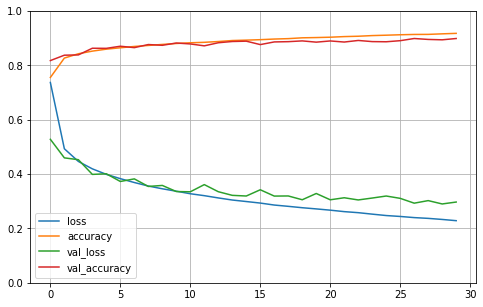

In [38]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
#만 개 전체에대해서 확인하는 것.

In [39]:
model.evaluate(X_test, y_test)
#evaluate: test 데이터를 그대로 넣어서 평가 가능함.
#진짜 성적에 가까움!

313/313 [==============================] - 1s 2ms/step - loss: 0.3267 - accuracy: 0.8852


[0.32674020528793335, 0.885200023651123]

In [40]:
#문제를 하나하나 여기서는 3개 줌.
X_new = X_test[:3]
y_proba = model.predict(X_new)
#이때 x값이 들어가서 나올 y값들을 출력하게 됨.
y_proba.round(2)
#보기 편하게 소수점 둘째자리까지만 출력

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

첫번째 샘플은 10번째에 해당할 확률이 99%라는 것.

In [41]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred
#여기서 각각의 샘플이 어느 인덱스에 포함되는지 출력

array([9, 2, 1])

In [42]:
np.array(class_names)[y_pred]
#어느 인덱스 이름인지 출력

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [43]:
y_new = y_test[:3]
y_new
#여기서 정답이랑 맞는지 확인.

array([9, 2, 1], dtype=uint8)

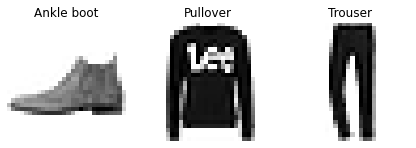

In [45]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()